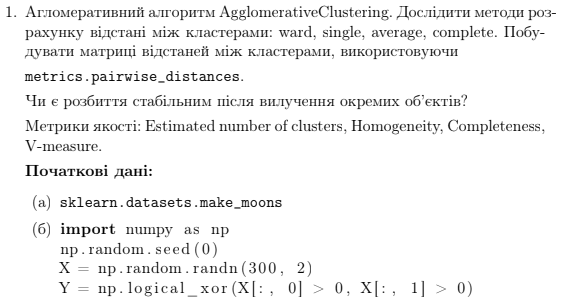

Опис заданого алгоритму

AgglomerativeClustering виконує ієрархічну кластеризацію, використовуючи підхід "знизу вверх": кожна перевірка починається у своєму кластері, і кластери послідовно поєднуються.

Критерій поєднання визначається метрикою, що використовується (linkage={"ward","complete","average","single"}).

Рекурсивно об'єднує пару кластерів, що мінімально збільшує задану відстань зв'язку (linkage distance).

Опис заданих метрик

Однорідність (Homogeneity) - максимальна, якщо кластер складається лише з об'єктів одного класу.

Повнота (Completeness) - максимальна, якщо всі об'єкти з класу належать лише до певного кластеру.

V-measure - середнє гармонічне між однорідністю та повнотою.

In [1]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# First dataset

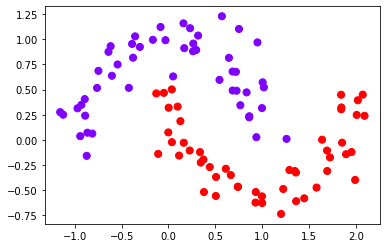

In [2]:
X, y = make_moons(n_samples=100, noise=0.15, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

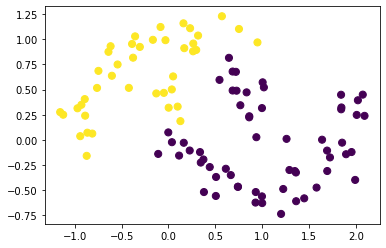

In [3]:
clustering = AgglomerativeClustering().fit(X)
y_pred = clustering.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred, s=50, edgecolor="face")

[[0.         0.9714298  1.9081828  ... 0.59392834 1.56167121 1.24638726]
 [0.9714298  0.         0.94045122 ... 0.99716613 0.78121185 0.4650157 ]
 [1.9081828  0.94045122 0.         ... 1.88027869 0.70467048 0.79050941]
 ...
 [0.59392834 0.99716613 1.88027869 ... 0.         1.75371483 1.42162535]
 [1.56167121 0.78121185 0.70467048 ... 1.75371483 0.         0.33265607]
 [1.24638726 0.4650157  0.79050941 ... 1.42162535 0.33265607 0.        ]]
[[0.         0.67243194 0.53864643 ... 0.31445898 1.33160981 1.31893174]
 [0.67243194 0.         0.19377012 ... 0.61836216 1.15772796 1.12685385]
 [0.53864643 0.19377012 0.         ... 0.57396242 1.04169585 1.01510422]
 ...
 [0.31445898 0.61836216 0.57396242 ... 0.         1.54098523 1.5219543 ]
 [1.33160981 1.15772796 1.04169585 ... 1.54098523 0.         0.04130972]
 [1.31893174 1.12685385 1.01510422 ... 1.5219543  0.04130972 0.        ]]


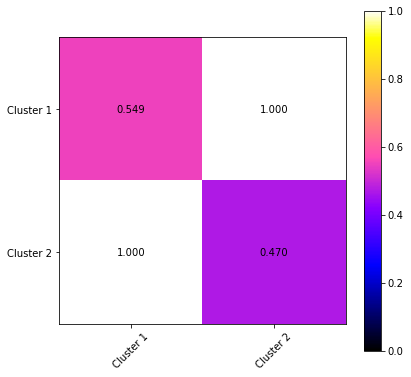

In [4]:
number_clusters = clustering.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred == i],X[y_pred == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

In [5]:
print('Homogeneity =',metrics.homogeneity_score(y, y_pred),
      '\nCompleteness =',metrics.completeness_score(y, y_pred),
      '\nV-measure =', metrics.v_measure_score(y, y_pred),
      '\nEstimated Number of Clusters =', number_clusters)

Homogeneity = 0.27117458649879606 
Completeness = 0.2777004161029733 
V-measure = 0.2743987069926898 
Estimated Number of Clusters = 2


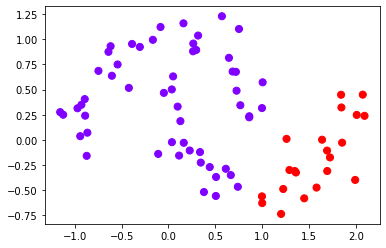

In [6]:
a = 25

clastering = AgglomerativeClustering().fit(X[a:, :])
y_pred = clastering.labels_

plt.scatter(X[a:, 0], X[a:, 1], c=y_pred, s=50, edgecolor='face', cmap='rainbow');
plt.show()

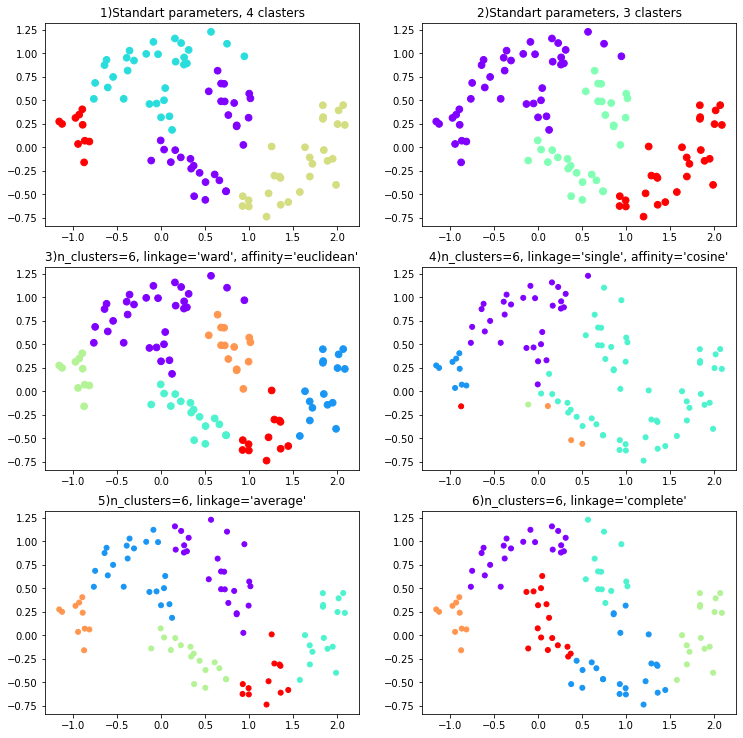

In [7]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

plt.subplot(321)
plt.title("1)Standart parameters, 4 clasters")
clustering1 = AgglomerativeClustering(n_clusters=4).fit(X)
y_pred1 = clustering1.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred1, s=45, edgecolor='face', cmap='rainbow')

plt.subplot(322)
plt.title("2)Standart parameters, 3 clasters")
clustering2 = AgglomerativeClustering(n_clusters=3).fit(X)
y_pred2 = clustering2.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred2, s=45, edgecolor="face", cmap='rainbow')

plt.subplot(323)
plt.title("3)n_clusters=6, linkage='ward', affinity='euclidean'")
clustering3 = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
clustering3.fit(X)
y_pred3 = clustering3.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred3, s=45, edgecolor="face", cmap='rainbow')

plt.subplot(324)
plt.title("4)n_clusters=6, linkage='single', affinity='cosine'")
clustering4 = AgglomerativeClustering(n_clusters=6, linkage='single', affinity='cosine').fit(X)
y_pred4 = clustering4.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred4, s=25, edgecolor="face", cmap='rainbow')

plt.subplot(325)
plt.title("5)n_clusters=6, linkage='average'")
clustering5 = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X)
y_pred5 = clustering5.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred5, s=25, edgecolor="face", cmap='rainbow')

plt.subplot(326)
plt.title("6)n_clusters=6, linkage='complete'")
clustering6 = AgglomerativeClustering(n_clusters=6, linkage='complete').fit(X)
y_pred6 = clustering6.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred6, s=25, edgecolor="face", cmap='rainbow')

plt.show()

In [8]:
print('1) Homogeneity =',metrics.homogeneity_score(y, y_pred1),', Completeness = ',metrics.completeness_score(y, y_pred1), ', V-measure = ', metrics.v_measure_score(y, y_pred1))
print('2) Homogeneity =',metrics.homogeneity_score(y, y_pred2),', Completeness = ',metrics.completeness_score(y, y_pred2), ', V-measure = ', metrics.v_measure_score(y, y_pred2))
print('3) Homogeneity =',metrics.homogeneity_score(y, y_pred3),', Completeness = ',metrics.completeness_score(y, y_pred3), ', V-measure = ', metrics.v_measure_score(y, y_pred3))
print('4) Homogeneity =',metrics.homogeneity_score(y, y_pred4),', Completeness = ',metrics.completeness_score(y, y_pred4), ', V-measure = ', metrics.v_measure_score(y, y_pred4))
print('5) Homogeneity =',metrics.homogeneity_score(y, y_pred5),', Completeness = ',metrics.completeness_score(y, y_pred5), ', V-measure = ', metrics.v_measure_score(y, y_pred5))
print('6) Homogeneity =',metrics.homogeneity_score(y, y_pred6),', Completeness = ',metrics.completeness_score(y, y_pred6), ', V-measure = ', metrics.v_measure_score(y, y_pred6))

1) Homogeneity = 0.4101187045557176 , Completeness =  0.21653548509023987 , V-measure =  0.2834266621139982
2) Homogeneity = 0.38360824736929194 , Completeness =  0.2450545146195134 , V-measure =  0.29906314974258974
3) Homogeneity = 0.730602919230583 , Completeness =  0.29486325072220354 , V-measure =  0.42015613593840884
4) Homogeneity = 0.28559512424298705 , Completeness =  0.18104834614862503 , V-measure =  0.22161040791553874
5) Homogeneity = 0.7690866585645713 , Completeness =  0.3047309989690721 , V-measure =  0.4365071557799834
6) Homogeneity = 0.7688452214668496 , Completeness =  0.3041524390736239 , V-measure =  0.43587448133196033


[[0.         0.94045122 0.69259613 0.52884261 0.50219768 0.60642233
  0.45794717 0.53045462 0.36080168 0.61878085 0.58418226 0.90191372
  0.57898517 0.29578733 0.22157279 1.0600412  0.2117936  0.84192618
  0.68584598 0.64427278 0.84399912 0.70051183 0.72692905 0.53137349
  0.72295835 0.77615294 0.50853715 0.45236541 0.55001748 0.78121185
  0.4650157 ]
 [0.94045122 0.         0.75583788 0.80283492 1.11356484 0.46138313
  0.92522653 0.9192568  0.81457479 0.39093272 0.67536376 0.10474074
  0.56073971 1.02792407 0.87871549 0.23955597 0.87578747 0.984308
  0.93964935 0.45844326 0.2577646  0.91501359 0.81049061 0.91792431
  0.2909675  0.19464551 0.83791961 0.71235852 1.12289709 0.70467048
  0.79050941]
 [0.69259613 0.75583788 0.         0.17557831 0.47914038 0.81005863
  0.31458031 1.08136516 0.33636114 0.74765889 0.96658579 0.80107044
  0.87345467 0.53275403 0.48157521 0.98484566 0.48909436 0.24138203
  0.19234316 0.84657748 0.8676076  0.1626545  1.15542605 1.08128448
  0.77109747 0.7325754

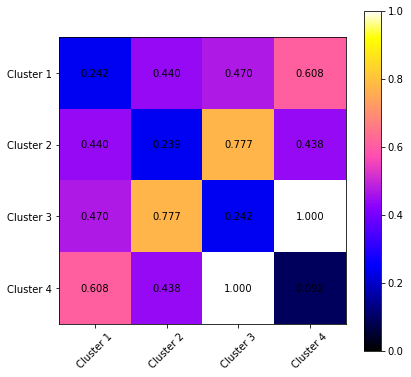

In [9]:
number_clusters = clustering1.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred1==j]))

avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred1 == i],X[y_pred1 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         0.67243194 0.53864643 ... 0.31445898 1.33160981 1.31893174]
 [0.67243194 0.         0.19377012 ... 0.61836216 1.15772796 1.12685385]
 [0.53864643 0.19377012 0.         ... 0.57396242 1.04169585 1.01510422]
 ...
 [0.31445898 0.61836216 0.57396242 ... 0.         1.54098523 1.5219543 ]
 [1.33160981 1.15772796 1.04169585 ... 1.54098523 0.         0.04130972]
 [1.31893174 1.12685385 1.01510422 ... 1.5219543  0.04130972 0.        ]]
[[0.         0.94045122 0.69259613 0.52884261 0.50219768 0.60642233
  0.45794717 0.53045462 0.36080168 0.61878085 0.58418226 0.90191372
  0.57898517 0.29578733 0.22157279 1.0600412  0.2117936  0.84192618
  0.68584598 0.64427278 0.84399912 0.70051183 0.72692905 0.53137349
  0.72295835 0.77615294 0.50853715 0.45236541 0.55001748 0.78121185
  0.4650157 ]
 [0.94045122 0.         0.75583788 0.80283492 1.11356484 0.46138313
  0.92522653 0.9192568  0.81457479 0.39093272 0.67536376 0.10474074
  0.56073971 1.02792407 0.87871549 0.23955597 0.87578747 0.984308


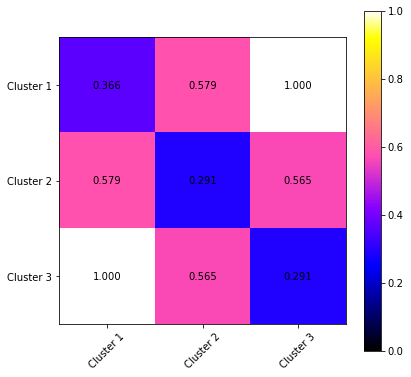

In [10]:
number_clusters = clustering2.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred2==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred2 == i],X[y_pred2 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         0.67243194 0.53864643 0.98131706 0.32594661 0.2883322
  0.21561321 0.38698567 0.87069212 0.49461852 0.13429327 0.29857152
  0.82084623 0.79181758 0.64725727 0.672042   0.56491909 0.36948716
  0.67340465 0.6144088  0.25477889 0.5245126  0.35828692 0.28124626
  0.3418631  0.58814039 0.35083221 0.14140032 0.61879043 0.77728239
  0.31445898]
 [0.67243194 0.         0.19377012 1.14841878 0.79454937 0.82297008
  0.61495486 0.62559575 0.78862213 0.18468948 0.69569734 0.68989015
  0.18327558 1.08427474 1.07237546 0.68348295 0.69373204 0.31481577
  0.09654718 0.46786048 0.85390027 0.15597271 0.74453797 0.67801202
  0.64522492 0.87015113 0.78321004 0.80745751 0.84891632 0.83352286
  0.61836216]
 [0.53864643 0.19377012 0.         1.19247033 0.61081866 0.7421497
  0.54000705 0.43314797 0.63414182 0.17027705 0.5343753  0.63384603
  0.37704471 1.09033957 1.03885333 0.50483123 0.5031178  0.24675282
  0.26289568 0.29754109 0.75510968 0.08095906 0.55582275 0.49461786
  0.60691814 0.6766061

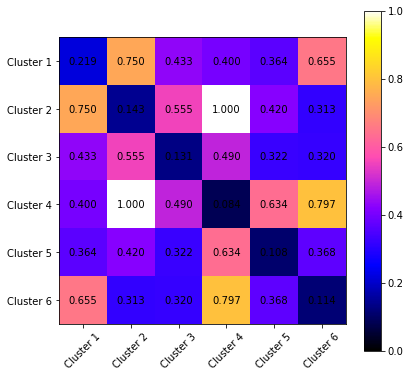

In [11]:
number_clusters = clustering3.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred3==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred3 == i],X[y_pred3 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         0.91789789 0.67243194 0.53864643 0.32594661 0.2883322
  0.21561321 0.38698567 0.87069212 0.49461852 0.13429327 0.29857152
  0.64725727 0.672042   0.56491909 0.36948716 0.67340465 0.6144088
  0.25477889 0.5245126  0.35828692 0.28124626 0.3418631  0.58814039
  0.35083221 0.14140032 0.61879043 0.77728239 0.31445898]
 [0.91789789 0.         0.24585974 0.40835456 1.01874005 1.06215357
  0.85496166 0.83272084 0.87930916 0.42906886 0.93543978 0.92306512
  1.28919862 0.82407052 0.86536305 0.55939704 0.27536052 0.61072876
  1.09699145 0.39601048 0.96100125 0.90276674 0.87261141 1.05523434
  1.01443605 1.05188955 1.02438813 0.96411459 0.84886841]
 [0.67243194 0.24585974 0.         0.19377012 0.79454937 0.82297008
  0.61495486 0.62559575 0.78862213 0.18468948 0.69569734 0.68989015
  1.07237546 0.68348295 0.69373204 0.31481577 0.09654718 0.46786048
  0.85390027 0.15597271 0.74453797 0.67801202 0.64522492 0.87015113
  0.78321004 0.80745751 0.84891632 0.83352286 0.61836216]
 [0.53864643

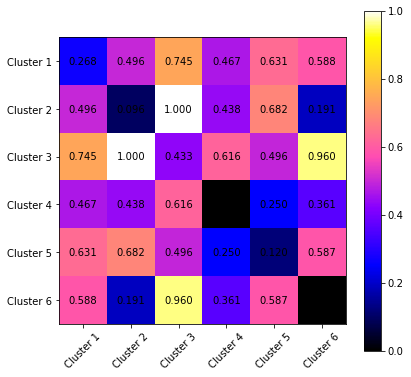

In [12]:
number_clusters = clustering4.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred4==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred4 == i],X[y_pred4 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         0.69259613 0.94311629 0.52884261 1.29411813 1.1728183
  0.50219768 0.45794717 0.36080168 1.1489668  0.29578733 1.09246592
  1.25805243 0.22157279 0.2117936  0.84192618 1.37385564 0.68584598
  0.70051183 1.07936815 1.1868879  0.50853715 1.08889576 0.55001748]
 [0.69259613 0.         0.55032858 0.17557831 0.60201964 0.49061211
  0.47914038 0.31458031 0.33636114 0.45678891 0.53275403 0.54731327
  0.63347592 0.48157521 0.48909436 0.24138203 0.6812624  0.19234316
  0.1626545  0.38782105 0.49656794 0.21133036 0.40030852 0.46083143]
 [0.94311629 0.55032858 0.         0.5469706  0.7321506  0.78278915
  0.45250946 0.51040081 0.65128976 0.68449886 0.65513166 0.2381288
  0.45984247 0.73981017 0.75068089 0.34055851 0.81164283 0.37228407
  0.39267847 0.65759092 0.63691504 0.52966196 0.69243431 0.40097574]
 [0.52884261 0.17557831 0.5469706  0.         0.76805004 0.66602192
  0.33469167 0.15003412 0.16806031 0.62791965 0.3582904  0.61593575
  0.74760649 0.31163112 0.32001487 0.32752703 0

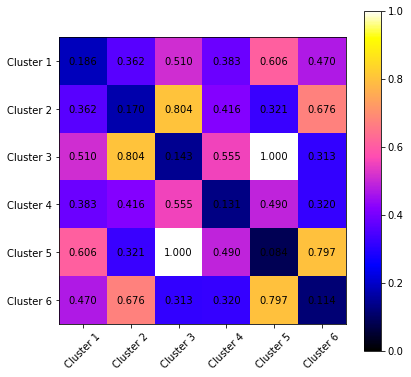

In [13]:
number_clusters = clustering5.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred5==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred5 == i],X[y_pred5 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         0.91789789 0.67243194 0.53864643 0.32594661 0.2883322
  0.21561321 0.38698567 0.87069212 0.49461852 0.13429327 0.29857152
  0.64725727 0.672042   0.56491909 0.36948716 0.67340465 0.6144088
  0.25477889 0.5245126  0.35828692 0.28124626 0.3418631  0.58814039
  0.35083221 0.14140032 0.61879043 0.77728239 0.31445898]
 [0.91789789 0.         0.24585974 0.40835456 1.01874005 1.06215357
  0.85496166 0.83272084 0.87930916 0.42906886 0.93543978 0.92306512
  1.28919862 0.82407052 0.86536305 0.55939704 0.27536052 0.61072876
  1.09699145 0.39601048 0.96100125 0.90276674 0.87261141 1.05523434
  1.01443605 1.05188955 1.02438813 0.96411459 0.84886841]
 [0.67243194 0.24585974 0.         0.19377012 0.79454937 0.82297008
  0.61495486 0.62559575 0.78862213 0.18468948 0.69569734 0.68989015
  1.07237546 0.68348295 0.69373204 0.31481577 0.09654718 0.46786048
  0.85390027 0.15597271 0.74453797 0.67801202 0.64522492 0.87015113
  0.78321004 0.80745751 0.84891632 0.83352286 0.61836216]
 [0.53864643

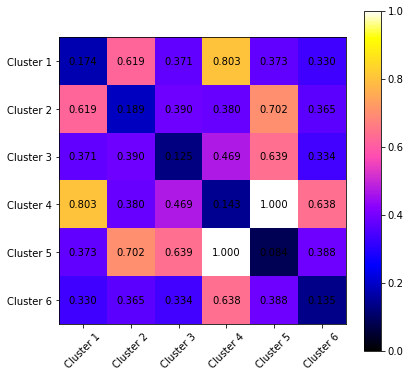

In [14]:
number_clusters = clustering6.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred4==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred6 == i],X[y_pred6 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

Отже, за оцінками результатів кластеризації на основі метрик якості та на основі неформальних методів можна зробити висновок, що для першого набору даних розбиття є доволі стабільним після видалення окремих об'єктів, але в той же час метрики показують не скрізь хороші результати. Були побудовані матриці відстаней між кластерами, матриці із середніми значеннями міжкластерних відстаней. Серед всіх побудованих моделей найкращими можна вважати альтернативні третю, п'яту та шосту моделі з параметрами. В них найвища однорідність серед всіх моделей, а це говорить про те, що в основному кластери складаються з об'єктів одних класів. Метрика повноти в цих моделях практично не відрізняється від показників всіх інших, це говорить про те, що не всі об'єкти з класів належать тільки до одних певних кластерів. 

# Second dataset

In [15]:
np.random.seed(0)
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0 , X[:, 1] > 0)

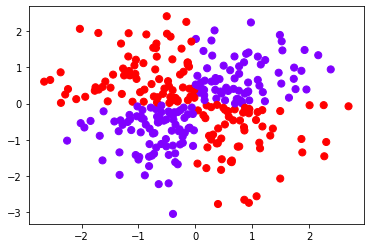

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

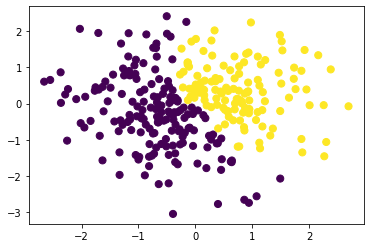

In [17]:
clustering = AgglomerativeClustering().fit(X)
y_pred = clustering.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred, s=50, edgecolor="face")

[[0.         3.23843916 0.71848846 ... 0.58012487 1.00969289 1.41489069]
 [3.23843916 0.         2.73138091 ... 2.90936916 2.25748064 1.82377564]
 [0.71848846 2.73138091 0.         ... 0.93526934 0.51663704 0.97595287]
 ...
 [0.58012487 2.90936916 0.93526934 ... 0.         0.90275378 1.15100373]
 [1.00969289 2.25748064 0.51663704 ... 0.90275378 0.         0.46170184]
 [1.41489069 1.82377564 0.97595287 ... 1.15100373 0.46170184 0.        ]]
[[0.         2.00125651 1.38131852 ... 1.98151833 1.22135964 1.4124272 ]
 [2.00125651 0.         3.33865633 ... 2.15719466 1.85371524 1.96439442]
 [1.38131852 3.33865633 0.         ... 2.52372045 1.93896685 2.03413648]
 ...
 [1.98151833 2.15719466 2.52372045 ... 0.         0.76028798 0.57256466]
 [1.22135964 1.85371524 1.93896685 ... 0.76028798 0.         0.20065231]
 [1.4124272  1.96439442 2.03413648 ... 0.57256466 0.20065231 0.        ]]


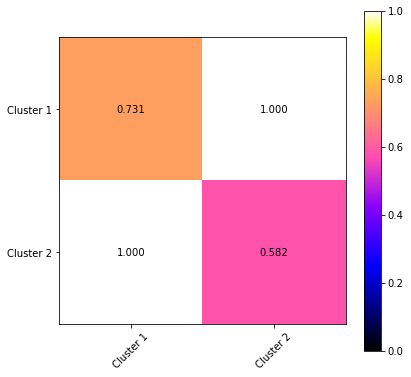

In [18]:
number_clusters = clustering.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred == i],X[y_pred == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

In [19]:
print('Homogeneity =',metrics.homogeneity_score(y, y_pred),
      '\nCompleteness =',metrics.completeness_score(y, y_pred),
      '\nV-measure =', metrics.v_measure_score(y, y_pred),
      '\nEstimated Number of Clusters =', number_clusters)

Homogeneity = 0.004215306187724392 
Completeness = 0.004286144259964354 
V-measure = 0.0042504300958241875 
Estimated Number of Clusters = 2


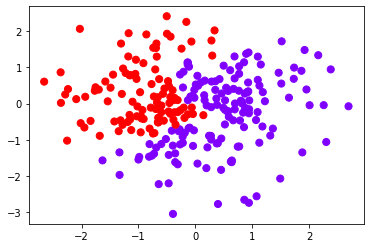

In [20]:
a = 50

clastering = AgglomerativeClustering().fit(X[a:, :])
y_pred = clastering.labels_

plt.scatter(X[a:, 0], X[a:, 1], c=y_pred, s=50, edgecolor='face', cmap='rainbow');
plt.show()

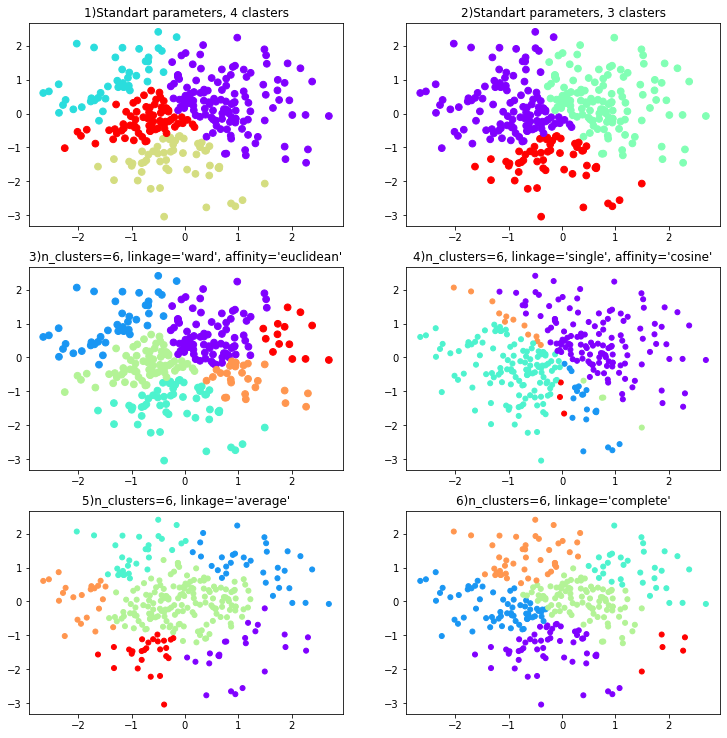

In [21]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

plt.subplot(321)
plt.title("1)Standart parameters, 4 clasters")
clustering1 = AgglomerativeClustering(n_clusters=4).fit(X)
y_pred1 = clustering1.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred1, s=45, edgecolor='face', cmap='rainbow')

plt.subplot(322)
plt.title("2)Standart parameters, 3 clasters")
clustering2 = AgglomerativeClustering(n_clusters=3).fit(X)
y_pred2 = clustering2.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred2, s=45, edgecolor="face", cmap='rainbow')

plt.subplot(323)
plt.title("3)n_clusters=6, linkage='ward', affinity='euclidean'")
clustering3 = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean')
clustering3.fit(X)
y_pred3 = clustering3.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred3, s=45, edgecolor="face", cmap='rainbow')

plt.subplot(324)
plt.title("4)n_clusters=6, linkage='single', affinity='cosine'")
clustering4 = AgglomerativeClustering(n_clusters=6, linkage='single', affinity='cosine').fit(X)
y_pred4 = clustering4.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred4, s=25, edgecolor="face", cmap='rainbow')

plt.subplot(325)
plt.title("5)n_clusters=6, linkage='average'")
clustering5 = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X)
y_pred5 = clustering5.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred5, s=25, edgecolor="face", cmap='rainbow')

plt.subplot(326)
plt.title("6)n_clusters=6, linkage='complete'")
clustering6 = AgglomerativeClustering(n_clusters=6, linkage='complete').fit(X)
y_pred6 = clustering6.labels_
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y_pred6, s=25, edgecolor="face", cmap='rainbow')

plt.show()

In [22]:
print('1) Homogeneity =',metrics.homogeneity_score(y, y_pred1),', Completeness = ',metrics.completeness_score(y, y_pred1), ', V-measure = ', metrics.v_measure_score(y, y_pred1))
print('2) Homogeneity =',metrics.homogeneity_score(y, y_pred2),', Completeness = ',metrics.completeness_score(y, y_pred2), ', V-measure = ', metrics.v_measure_score(y, y_pred2))
print('3) Homogeneity =',metrics.homogeneity_score(y, y_pred3),', Completeness = ',metrics.completeness_score(y, y_pred3), ', V-measure = ', metrics.v_measure_score(y, y_pred3))
print('4) Homogeneity =',metrics.homogeneity_score(y, y_pred4),', Completeness = ',metrics.completeness_score(y, y_pred4), ', V-measure = ', metrics.v_measure_score(y, y_pred4))
print('5) Homogeneity =',metrics.homogeneity_score(y, y_pred5),', Completeness = ',metrics.completeness_score(y, y_pred5), ', V-measure = ', metrics.v_measure_score(y, y_pred5))
print('6) Homogeneity =',metrics.homogeneity_score(y, y_pred6),', Completeness = ',metrics.completeness_score(y, y_pred6), ', V-measure = ', metrics.v_measure_score(y, y_pred6))

1) Homogeneity = 0.15857987301065898 , Completeness =  0.08415439022491246 , V-measure =  0.10995722101419747
2) Homogeneity = 0.020014244996718656 , Completeness =  0.013284435682427511 , V-measure =  0.015969278359894055
3) Homogeneity = 0.2943928694354335 , Completeness =  0.12295643938156081 , V-measure =  0.17346380233721226
4) Homogeneity = 0.15701357514442146 , Completeness =  0.09501872473678827 , V-measure =  0.118391410018626
5) Homogeneity = 0.32300559947748314 , Completeness =  0.15814836626224385 , V-measure =  0.21233456019586514
6) Homogeneity = 0.18498755613774231 , Completeness =  0.079983689541764 , V-measure =  0.11167994641280572


[[0.         2.00125651 1.38131852 ... 1.98151833 1.22135964 1.4124272 ]
 [2.00125651 0.         3.33865633 ... 2.15719466 1.85371524 1.96439442]
 [1.38131852 3.33865633 0.         ... 2.52372045 1.93896685 2.03413648]
 ...
 [1.98151833 2.15719466 2.52372045 ... 0.         0.76028798 0.57256466]
 [1.22135964 1.85371524 1.93896685 ... 0.76028798 0.         0.20065231]
 [1.4124272  1.96439442 2.03413648 ... 0.57256466 0.20065231 0.        ]]
[[0.         1.54904806 1.30608186 ... 1.98255361 0.66083328 1.41927743]
 [1.54904806 0.         1.25787011 ... 1.21803269 2.03947063 1.2961547 ]
 [1.30608186 1.25787011 0.         ... 0.77532564 1.34478532 0.11323937]
 ...
 [1.98255361 1.21803269 0.77532564 ... 0.         2.11545057 0.69013917]
 [0.66083328 2.03947063 1.34478532 ... 2.11545057 0.         1.44351449]
 [1.41927743 1.2961547  0.11323937 ... 0.69013917 1.44351449 0.        ]]
[[0.         1.64666437 1.47454358 ... 1.14947246 2.30276803 0.58012487]
 [1.64666437 0.         0.58336837 ... 

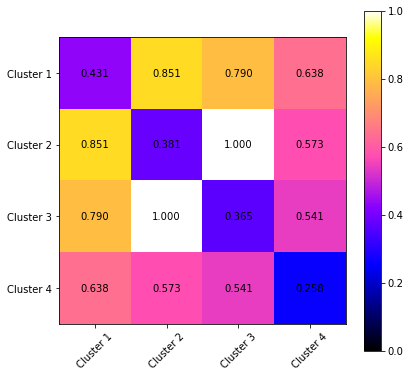

In [23]:
number_clusters = clustering1.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred1==j]))

avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred1 == i],X[y_pred1 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         2.73138091 2.2604523  ... 2.29318002 2.25748064 1.82377564]
 [2.73138091 0.         0.52248578 ... 0.66364738 0.51663704 0.97595287]
 [2.2604523  0.52248578 0.         ... 0.66008496 0.3925589  0.67170826]
 ...
 [2.29318002 0.66364738 0.66008496 ... 0.         0.26752742 0.47597609]
 [2.25748064 0.51663704 0.3925589  ... 0.26752742 0.         0.46170184]
 [1.82377564 0.97595287 0.67170826 ... 0.47597609 0.46170184 0.        ]]
[[0.         2.00125651 1.38131852 ... 1.98151833 1.22135964 1.4124272 ]
 [2.00125651 0.         3.33865633 ... 2.15719466 1.85371524 1.96439442]
 [1.38131852 3.33865633 0.         ... 2.52372045 1.93896685 2.03413648]
 ...
 [1.98151833 2.15719466 2.52372045 ... 0.         0.76028798 0.57256466]
 [1.22135964 1.85371524 1.93896685 ... 0.76028798 0.         0.20065231]
 [1.4124272  1.96439442 2.03413648 ... 0.57256466 0.20065231 0.        ]]
[[0.         1.64666437 1.47454358 ... 1.14947246 2.30276803 0.58012487]
 [1.64666437 0.         0.58336837 ... 

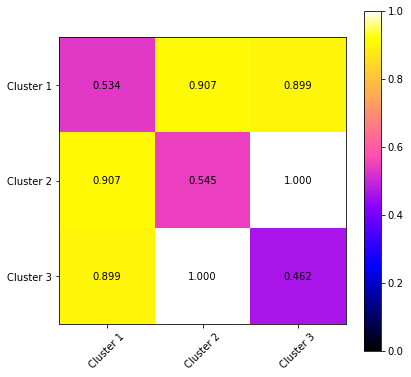

In [24]:
number_clusters = clustering2.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred2==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred2 == i],X[y_pred2 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         2.12617245 1.14694608 ... 2.15719466 1.85371524 1.96439442]
 [2.12617245 0.         1.07256525 ... 0.11893423 0.64715615 0.4560786 ]
 [1.14694608 1.07256525 0.         ... 1.07152014 1.09092083 1.09492516]
 ...
 [2.15719466 0.11893423 1.07152014 ... 0.         0.76028798 0.57256466]
 [1.85371524 0.64715615 1.09092083 ... 0.76028798 0.         0.20065231]
 [1.96439442 0.4560786  1.09492516 ... 0.57256466 0.20065231 0.        ]]
[[0.         1.54904806 1.30608186 ... 1.98255361 0.66083328 1.41927743]
 [1.54904806 0.         1.25787011 ... 1.21803269 2.03947063 1.2961547 ]
 [1.30608186 1.25787011 0.         ... 0.77532564 1.34478532 0.11323937]
 ...
 [1.98255361 1.21803269 0.77532564 ... 0.         2.11545057 0.69013917]
 [0.66083328 2.03947063 1.34478532 ... 2.11545057 0.         1.44351449]
 [1.41927743 1.2961547  0.11323937 ... 0.69013917 1.44351449 0.        ]]
[[0.         1.64666437 1.47454358 ... 1.14947246 2.30276803 0.58012487]
 [1.64666437 0.         0.58336837 ... 

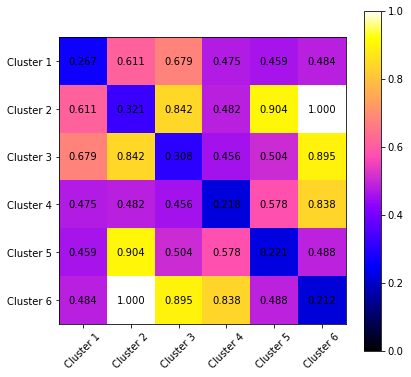

In [25]:
number_clusters = clustering3.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred3==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred3 == i],X[y_pred3 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         2.00125651 1.38131852 ... 1.98151833 1.22135964 1.4124272 ]
 [2.00125651 0.         3.33865633 ... 2.15719466 1.85371524 1.96439442]
 [1.38131852 3.33865633 0.         ... 2.52372045 1.93896685 2.03413648]
 ...
 [1.98151833 2.15719466 2.52372045 ... 0.         0.76028798 0.57256466]
 [1.22135964 1.85371524 1.93896685 ... 0.76028798 0.         0.20065231]
 [1.4124272  1.96439442 2.03413648 ... 0.57256466 0.20065231 0.        ]]
[[0.         0.71848846 0.47221533 0.69900714 0.25335505 0.25294964
  0.8104895  0.83001602 0.56147687 1.92042264 0.05330919 0.14280478
  0.78897074 1.98803674 0.18179704 1.88347226 0.0789476  0.36820143
  1.86889046 0.9349432  0.98573983]
 [0.71848846 0.         0.25177028 1.41289835 0.97029914 0.97123022
  1.52893975 1.54839523 0.16344906 2.60943509 0.73997824 0.83941354
  1.50697648 2.705614   0.87969092 2.60007616 0.7284987  1.03506891
  2.58695143 1.60135513 1.69247604]
 [0.47221533 0.25177028 0.         1.17050668 0.7254476  0.72501469
  1.2810

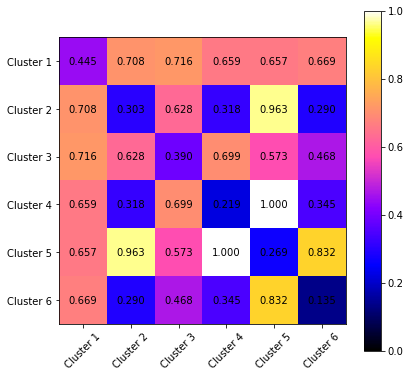

In [26]:
number_clusters = clustering4.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred4==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred4 == i],X[y_pred4 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         0.85770345 0.62399912 0.77236261 1.50922295 0.37080917
  0.74799952 1.39058441 1.38411122 1.15463964 2.31941414 0.44413341
  1.14018907 1.11363736 0.57955212 1.36045254 1.95105369 1.99016922
  0.55656443 1.95621517 1.76791385 0.76819622 1.85582634 1.65089526]
 [0.85770345 0.         1.47043929 1.0890418  1.68209072 1.20702664
  0.9488112  1.64506052 1.64996951 1.86482681 2.79120342 1.17754763
  1.23518502 1.21551954 0.50131844 1.60881804 2.05556504 2.59372771
  0.69949027 2.53051954 2.39048069 0.52904943 2.04266414 1.92911517]
 [0.62399912 1.47043929 0.         1.15147635 1.80594923 0.40103312
  1.20288042 1.65114184 1.63771398 0.98996509 2.28850871 0.3958268
  1.54552783 1.5207496  1.18512679 1.63058991 2.24028121 1.84720902
  1.10941305 1.85016354 1.62494118 1.36418693 2.10032748 1.85436325]
 [0.77236261 1.0890418  1.15147635 0.         0.73808939 0.75227521
  0.15541939 0.63184588 0.62872347 0.90751058 1.70670785 1.17756362
  0.3948868  0.36967493 0.59001671 0.59905055 

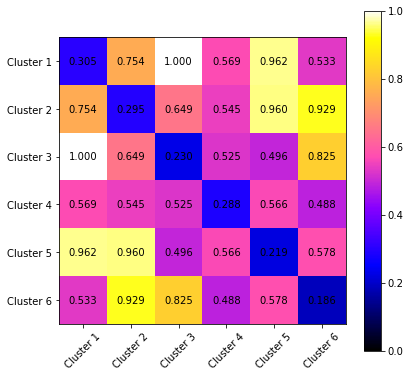

In [27]:
number_clusters = clustering5.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred5==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred5 == i],X[y_pred5 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

[[0.         2.00125651 1.38131852 ... 1.98151833 1.22135964 1.4124272 ]
 [2.00125651 0.         3.33865633 ... 2.15719466 1.85371524 1.96439442]
 [1.38131852 3.33865633 0.         ... 2.52372045 1.93896685 2.03413648]
 ...
 [1.98151833 2.15719466 2.52372045 ... 0.         0.76028798 0.57256466]
 [1.22135964 1.85371524 1.93896685 ... 0.76028798 0.         0.20065231]
 [1.4124272  1.96439442 2.03413648 ... 0.57256466 0.20065231 0.        ]]
[[0.         0.71848846 0.47221533 0.69900714 0.25335505 0.25294964
  0.8104895  0.83001602 0.56147687 1.92042264 0.05330919 0.14280478
  0.78897074 1.98803674 0.18179704 1.88347226 0.0789476  0.36820143
  1.86889046 0.9349432  0.98573983]
 [0.71848846 0.         0.25177028 1.41289835 0.97029914 0.97123022
  1.52893975 1.54839523 0.16344906 2.60943509 0.73997824 0.83941354
  1.50697648 2.705614   0.87969092 2.60007616 0.7284987  1.03506891
  2.58695143 1.60135513 1.69247604]
 [0.47221533 0.25177028 0.         1.17050668 0.7254476  0.72501469
  1.2810

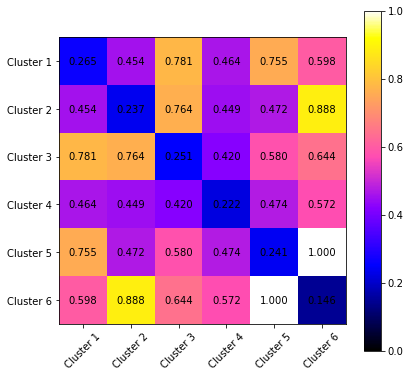

In [28]:
number_clusters = clustering6.n_clusters_
for j in range(number_clusters):
    print(metrics.pairwise_distances(X[y_pred4==j]))
    
avg_dist = np.zeros((number_clusters, number_clusters))
for i in range(number_clusters):
    for j in range(number_clusters):
        avg_dist[i, j] = metrics.pairwise_distances(X[y_pred6 == i],X[y_pred6 == j]).mean()

avg_dist /= avg_dist.max()

plt.figure(figsize=(6, 5.5))
for i in range(number_clusters):
    for j in range(number_clusters):
        plt.text(i, j, '%5.3f' % avg_dist[i, j], verticalalignment='center', horizontalalignment='center')

clusters = ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2, vmin=0)
plt.xticks(range(number_clusters), clusters, rotation=45)
plt.yticks(range(number_clusters), clusters)
plt.colorbar()
plt.tight_layout()
plt.show()

Отже, за оцінками результатів кластеризації на основі метрик якості та на основі неформальних методів можна зробити висновок, що для другого набору даних розбиття є доволі стабільним після видалення окремих об'єктів, але в той же час метрики показують далеко ненайкращі результати, а це говорить про те, що кластери складаються з об'єктів різних класів (у випадку homogeneity) і відповідно об'єкти з класів належать до різних кластерів (у випадку completeness). Були побудовані матриці відстаней між кластерами, матриці із середніми значеннями міжкластерних відстаней. Серед всіх побудованих моделей найкращою можна вважати модель з параметрами n_clusters=6, linkage='average.